In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\Big_mart_sales_train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,11,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,22,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

Item_Identifier           0
Item_Weight               0
Item_Visibility           0
Item_MRP                  0
Outlet_Identifier         0
Item_Outlet_Sales         0
Outlet_Years              0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Size_3             0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Item_Type_Combined_0      0
Item_Type_Combined_1      0
Item_Type_Combined_2      0
Outlet_0                  0
Outlet_1                  0
Outlet_2                  0
Outlet_3                  0
Outlet_4                  0
Outlet_5                  0
Outlet_6                  0
Outlet_7                  0
Outlet_8                  0
Outlet_9                  0
dtype: int64

In [5]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [7]:
df = pd.get_dummies(df)

In [8]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,0.016047,249.8092,3735.1380,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,443.4228,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,2097.2700,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.017834,182.0950,732.3800,11,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.009780,53.8614,994.7052,22,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,22,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,549.2850,7,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,5,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

In [32]:
x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

In [33]:
x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [35]:
x_train_scaled=scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled=scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [36]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.183090,0.401712,0.059636,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.961298,0.298656,0.391551,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.726109,0.221030,0.016822,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.657636,0.313105,0.602663,0.208333,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.171480,0.367938,0.745649,0.291667,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,0.830307,0.149546,0.369368,0.416667,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2553,0.791605,0.218117,0.410495,0.458333,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2554,0.663590,0.047275,0.119541,0.500000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2555,0.761834,0.116574,0.265241,0.916667,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
rmse_err=[]
for k in range(40):
    k+=1
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_err.append(error)
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 1581.3238166678098
RMSE value for k=  2 is: 1308.6690675709524
RMSE value for k=  3 is: 1270.8882860054416
RMSE value for k=  4 is: 1235.6132096639165
RMSE value for k=  5 is: 1207.4682007294593
RMSE value for k=  6 is: 1187.42782029123
RMSE value for k=  7 is: 1174.6103588656501
RMSE value for k=  8 is: 1162.0004144129784
RMSE value for k=  9 is: 1159.4993202528678
RMSE value for k=  10 is: 1148.8789965971093
RMSE value for k=  11 is: 1144.724128196296
RMSE value for k=  12 is: 1141.5893690209905
RMSE value for k=  13 is: 1143.9875078459945
RMSE value for k=  14 is: 1140.3125044283192
RMSE value for k=  15 is: 1139.366186650256
RMSE value for k=  16 is: 1137.5160467839894
RMSE value for k=  17 is: 1136.5906668189668
RMSE value for k=  18 is: 1137.2009180732043
RMSE value for k=  19 is: 1135.0143630133578
RMSE value for k=  20 is: 1132.426036149403
RMSE value for k=  21 is: 1132.6841905522701
RMSE value for k=  22 is: 1133.5209579666819
RMSE value for k=  23 is

<AxesSubplot:>

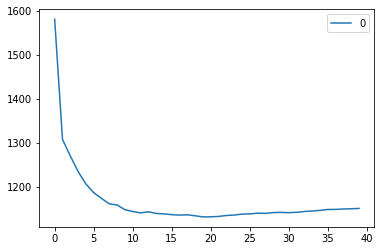

In [39]:
curve=pd.DataFrame(rmse_err)
curve.plot()

For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. You can simply use gridsearch to find the best value

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 17}